<h1 style='text-align: center'>Exemplo de Aprendizado Não-Supervisionado com K-means</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

<h2>Carregando os dados usando o Numpy</h2>

In [2]:
data = np.genfromtxt('points.txt')

In [3]:
data.shape

(300L, 2L)

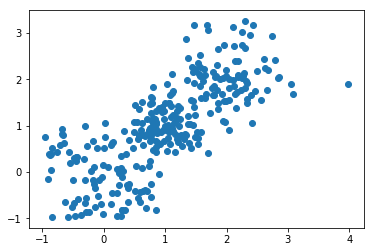

In [4]:
plt.scatter(data[:,0], data[:, 1], marker='o')

<h2>Distância entre um ponto e os centróides</h2>

In [5]:
def calculate_dist(x, centroids):
    
    dist = []
    for c in centroids:
        d = np.linalg.norm(x - c) # Distância Euclidiana
        dist.append(d)
    
    return np.array(dist)

In [35]:
def kmeans(data, centroids, thresh):
    
    N = data.shape[0]
    iteration = 0
    k, dim = centroids.shape
    prev_assignments = -1 * np.ones(N)
    old_D = np.zeros((N, k))
    
    while True:
        D = []
        iteration += 1
        
        # Calculando distâncias entre os pontos e centroides
        for i in range(N):
            dist = calculate_dist(data[i], centroids)
            D.append(dist)
        
        D = np.array(D)
        
        print("Iteração {}: Dists = {}".format(iteration, np.sum(np.abs(old_D - D))))
        
        # Associando pontos aos centroides
        assignments = np.argmin(D, axis=1)
        
        if (assignments == prev_assignments).all():
            print('\n')
            print("Centroides = {}".format(centroids))
            return
        
        # Recalculando os centroides
        centroid_sums = np.zeros((k, dim), np.float)
        for i in range(N):
            centroid_sums[assignments[i]] += data[i]
        
        for j in range(k):
            centroids[j] = centroid_sums[j] / (np.sum(assignments == j) + 1e-15)
        
        prev_assignments = assignments.copy()
        old_D = D.copy()

In [50]:
random_idx = [random.randrange(data.shape[0]) for i in range(3)]

In [51]:
centroids = data[random_idx] * 1000

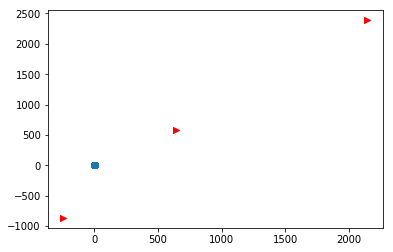

In [52]:
plt.scatter(data[:,0], data[:, 1], marker='o')
plt.scatter(centroids[:,0], centroids[:, 1], c='r', marker='>')

In [53]:
kmeans(data, centroids, 0)

Iteração 1: Dists = 1493829.2359
Iteração 2: Dists = 1492475.33036
Iteração 3: Dists = 197.080536975
Iteração 4: Dists = 208.21951573
Iteração 5: Dists = 83.7993861349
Iteração 6: Dists = 84.8207438123
Iteração 7: Dists = 89.4786758895
Iteração 8: Dists = 127.264998008
Iteração 9: Dists = 89.9215232908
Iteração 10: Dists = 38.2088366732
Iteração 11: Dists = 26.6709775095
Iteração 12: Dists = 19.0036007622
Iteração 13: Dists = 8.10439575952


Centroides = [[-0.0623803  -0.12394397]
 [ 2.05159504  2.11016537]
 [ 1.00578938  1.01159839]]


In [54]:
centroids

array([[-0.0623803 , -0.12394397],
       [ 2.05159504,  2.11016537],
       [ 1.00578938,  1.01159839]])

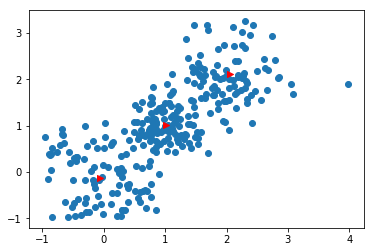

In [55]:
plt.scatter(data[:,0], data[:, 1], marker='o')
plt.scatter(centroids[:,0], centroids[:, 1], c='r', marker='>')